**Clone YOLOv5 repository**:

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.
/content/yolov5/yolov5/yolov5/yolov5/yolov5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

annotations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/New Projects/annot_tab.csv')

In [ ]:
!pip install matplotlib pandas opencv-python


**Splitting labels**

In [ ]:
import json
import os
from sklearn.model_selection import train_test_split

# Load COCO annotations
with open('/content/annot_COCO.json') as f:
    data = json.load(f)

#
base_path = '/content/labels'
os.makedirs(f'{base_path}/train', exist_ok=True)
os.makedirs(f'{base_path}/val', exist_ok=True)
os.makedirs(f'{base_path}/test', exist_ok=True)

# Split data into train, validation, and test sets
image_filenames = [img['file_name'].split('.')[0] for img in data['images']]
train_files, test_files = train_test_split(image_filenames, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42) # 60% train, 20% val, 20% test

# Conversion function
def convert_bbox(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[2] / 2.0) * dw
    y = (box[1] + box[3] / 2.0) * dh
    w = box[2] * dw
    h = box[3] * dh
    return (x, y, w, h)

# Iterate over the annotations
for ann in data['annotations']:
    img_id = ann['image_id']
    category_id = ann['category_id'] - 1 # YOLO classes start from 0
    bbox = ann['bbox']

    # Find corresponding image
    image_info = next(img for img in data['images'] if img['id'] == img_id)
    img_width = image_info['width']
    img_height = image_info['height']
    image_name = image_info['file_name'].split('.')[0]

    # Determine which folder the file belongs to
    if image_name in train_files:
        folder = 'train'
    elif image_name in val_files:
        folder = 'val'
    else:
        folder = 'test'

    # Convert bounding box
    yolo_bbox = convert_bbox((img_width, img_height), bbox)

    # Save annotation
    label_path = f'{base_path}/{folder}/{image_name}.txt'
    with open(label_path, 'a') as out_file:
        out_file.write(f"{category_id} " + " ".join([str(a) for a in yolo_bbox]) + '\n')

print("Conversion completed successfully.")



Conversion completed successfully.


**Moving images to corresponding folder.**

In [ ]:
#Performing 80-10-10 split
import os
import shutil

# Define the paths
base_path = '/content/drive/MyDrive/Colab Notebooks/New Projects/22022540'
images_path = os.path.join(base_path, 'images')
labels_path = os.path.join(base_path, 'labels')

# Function to move images based on label files
def move_images(split):
    label_files = os.listdir(os.path.join(labels_path, split))
    for label_file in label_files:
        # Get the image file name corresponding to the label file
        image_file = label_file.replace('.txt', '.jpg')
        # Source and destination paths for the image file
        src = os.path.join(images_path, image_file)
        dst = os.path.join(images_path, split, image_file)
        # Move the image file to the respective split folder
        if os.path.exists(src):
            shutil.move(src, dst)
        else:
            print(f"Image file {image_file} not found.")

# Create train, val, test subfolders under images directory if they don't exist
os.makedirs(os.path.join(images_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(images_path, 'val'), exist_ok=True)
os.makedirs(os.path.join(images_path, 'test'), exist_ok=True)

# Move images to their respective folders
move_images('train')
move_images('val')
move_images('test')

print("Images have been successfully moved to their corresponding folders.")


Image file sp01_img03.jpg not found.
Image file sp02_img07.jpg not found.
Image file sp02_img06.jpg not found.
Image file sp02_img02.jpg not found.
Image file sp02_img03.jpg not found.
Image file sp01_img05.jpg not found.
Image file sp01_img12.jpg not found.
Image file sp02_img01.jpg not found.
Image file sp01_img11.jpg not found.
Image file sp01_img07.jpg not found.
Image file sp01_img08.jpg not found.
Image file sp03_img02.jpg not found.
Image file sp03_img05.jpg not found.
Image file sp03_img08.jpg not found.
Image file sp03_img06.jpg not found.
Image file sp02_img09.jpg not found.
Image file sp03_img07.jpg not found.
Image file sp03_img10.jpg not found.
Image file sp04_img01.jpg not found.
Image file sp02_img08.jpg not found.
Image file sp02_img10.jpg not found.
Image file sp05_img09.jpg not found.
Image file sp04_img03.jpg not found.
Image file sp04_img02.jpg not found.
Image file sp05_img04.jpg not found.
Image file sp05_img05.jpg not found.
Image file sp04_img04.jpg not found.
I

**Verifying if they've been moved the right corresponding folders.**

In [ ]:
import os

def count_images(folder):
    return len([f for f in os.listdir(folder) if f.endswith('.jpg') or f.endswith('.png')])

print("Train images:", count_images('/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/images/train'))
print("Validation images:", count_images('/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/images/val'))
print("Test images:", count_images('/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/images/test'))


Train images: 221
Validation images: 74
Test images: 74


In [ ]:
import os

base_path = '/content/drive/MyDrive/Colab Notebooks/New Projects/22022540'
image_dir = os.path.join(base_path, 'images')
label_dir = os.path.join(base_path, 'labels')

for split in ['train', 'val', 'test']:
    split_image_dir = os.path.join(image_dir, split)
    split_label_dir = os.path.join(label_dir, split)

    # Get list of images and labels
    image_files = {os.path.splitext(f)[0] for f in os.listdir(split_image_dir) if f.endswith('.jpg')}
    label_files = {os.path.splitext(f)[0] for f in os.listdir(split_label_dir) if f.endswith('.txt')}

    # Find missing matches
    missing_images = label_files - image_files
    missing_labels = image_files - label_files

    if missing_images:
        print(f"Missing images for labels in {split}: {missing_images}")
    if missing_labels:
        print(f"Missing labels for images in {split}: {missing_labels}")

    if not missing_images and not missing_labels:
        print(f"All images and labels match correctly in {split} folder.")


All images and labels match correctly in train folder.
All images and labels match correctly in val folder.
All images and labels match correctly in test folder.


**Configuring Yolo environment:**

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/sp01_img05.jpg"

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/sp01_img05.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Traceback (most recent call last):
  File "/content/yolov5/yolov5/yolov5/yolov5/detect.py", line 437, in <module>
    main(opt)
  File "/content/yolov5/yolov5/yolov5/yolov5/detect.py", line 432, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "

## **Troubleshooting**

In [ ]:
import os

# Define the path to the label folders
label_folders = [
    '/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/train',
    '/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/val',
    '/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test'
]

# Check label consistency in each folder
for folder in label_folders:
    for filename in os.listdir(folder):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()
            # Check each line in the file
            corrected_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0:
                    label = int(parts[0])
                    if label != 0:
                        print(f"Incorrect label {label} found in {file_path}. Correcting to 0.")
                        parts[0] = '0'
                corrected_lines.append(" ".join(parts))
            # Write the corrected lines back to the file
            with open(file_path, 'w') as file:
                file.write("\n".join(corrected_lines))


Streaming output truncated to the last 5000 lines.
Incorrect label 20 found in /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test/sp21_img37.txt. Correcting to 0.
Incorrect label 20 found in /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test/sp21_img37.txt. Correcting to 0.
Incorrect label 20 found in /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test/sp21_img37.txt. Correcting to 0.
Incorrect label 20 found in /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test/sp21_img37.txt. Correcting to 0.
Incorrect label 20 found in /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test/sp21_img37.txt. Correcting to 0.
Incorrect label 20 found in /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test/sp21_img37.txt. Correcting to 0.
Incorrect label 20 found in /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/labels/test/sp21_img37.txt. Correcting to 0.
Incorrect l

## **Training the model:**

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/custom_data.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-01 04:11:17.163784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 04:11:17.188064: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 04:11:17.195264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: djcode46 (djcode46-university-of-pittsburgh). Use `wandb login 

In [ ]:
!PYTHONIOENCODING=UTF-8 LC_ALL=C.UTF-8 LANG=C.UTF-8 python /content/yolov5/yolov5/detect.py \
    --weights "/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/results/trained_model/best.pt" \
    --source "/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/sp23_img08.jpg" \
    --imgsz 640 \
    --conf-thres 0.25 \
    --iou-thres 0.45 \
    --save-txt \
    --save-conf \
    --project "/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/results" \
    --name test_results \
    --exist-ok

detect: weights=['/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/results/trained_model/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/sp23_img08.jpg, data=../../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/results, name=test_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/New Projects/22022540/sp23_img08.jpg: 640x640 232 bacteria_colonys, 410.0ms
Speed: 3.4ms pre-process, 41

## **Running inference/testing the model:**

['/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/results/test_results/sp01_img05.jpg', '/content/drive/MyDrive/Colab Notebooks/New Projects/22022540/results/test_results/sp23_img08.jpg']


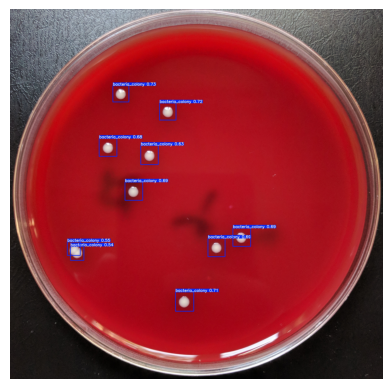

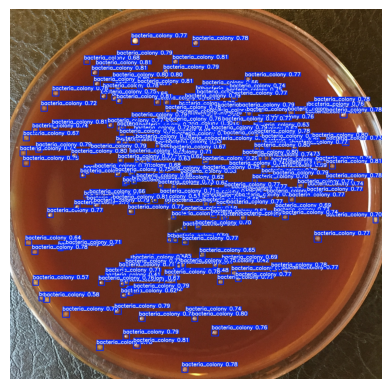

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob

# Enable inline plotting
%matplotlib inline

# Load image paths
image_paths = glob.glob('/content/test_results/*.jpg')
print(image_paths)  # Check if paths are correct

# Display the first 5 images
for img_path in image_paths[:5]:
    img = cv2.imread(img_path)
    if img is not None:  # Check if image was loaded successfully
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show(block=True)  # Ensures each image is displayed
    else:
        print(f"Warning: Could not load image {img_path}")



**exporting the trained model**

In [ ]:
import shutil
import os

# Define source and destination paths
source_path = '/content/best.pt'
destination_dir = '/content/trained_model'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Copy the trained model to the destination directory
shutil.copy(source_path, os.path.join(destination_dir, 'best.pt'))

print(f'Model exported to {destination_dir}')


FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/train/exp/weights/best.pt'

In [ ]:
from pathlib import Path
import torch
from yolov5.models.common import DetectMultiBackend
import os

# Directory setup
test_dir = Path('/content/test')
output_dir = Path('/content/batch_inference')
output_dir.mkdir(parents=True, exist_ok=True)

# Load model
model = DetectMultiBackend(model_path, device='cpu')

# Run batch inference
for img_path in test_dir.glob('*.jpg'):
    results = model(str(img_path))
    results.save(output_dir)  # Save each result in the output folder

print(f"Inference complete. Results saved to {output_dir}")


NameError: name 'model_path' is not defined